- Phần 1: Mô tả dữ liệu (2 điểm)
Một công ty thu thập dữ liệu về số giờ học tập của sinh viên mỗi tuần và lưu trữ trong tập dữ liệu study_hours.csv, bao gồm:

- StudentID: Mã sinh viên

- Gender: Giới tính (Nam, Nữ)

- StudyHours: Số giờ học tập trong một tuần

- Câu hỏi:

- Đọc dữ liệu từ tệp study_hours.csv và hiển thị 5 dòng đầu tiên.

- Kiểm tra dữ liệu bị thiếu (nếu có). Nếu có, đề xuất cách xử lý.

- Tính trung bình, trung vị, độ lệch chuẩn của số giờ học tập.

- So sánh trung bình số giờ học giữa nam và nữ.

In [1]:
from scipy.stats import binom, poisson, norm 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("study_hours.csv")
df.head()

,StudentID,Gender,StudyHours
0,SV001,Nam,15.0
1,SV002,Nữ,12.7
2,SV003,Nam,11.5
3,SV004,Nam,10.8
4,SV005,Nam,6.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   100 non-null    object 
 1   Gender      100 non-null    object 
 2   StudyHours  100 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [4]:
trung_binh = df['StudyHours'].mean()
trung_vi = df['StudyHours'].median()
do_lech_chuan = df['StudyHours'].std()
print("Trung bình: ",trung_binh)
print("Trung vị: ",trung_vi)
print("Độ lệch chuẩn: ",do_lech_chuan)

Trung bình:  11.879000000000001
Trung vị:  11.9
Độ lệch chuẩn:  3.760568810403258


In [5]:
nam = df[df['Gender'] == 'Nam']
sghtb_nam = nam['StudyHours'].mean()

nu = df[df['Gender'] == 'Nữ']
sghtb_nu = nu['StudyHours'].mean()

print("Số giờ học của nam: ", sghtb_nam)
print("Số giờ học trung bình của nữ: ", sghtb_nu)


Số giờ học của nam:  12.236363636363638
Số giờ học trung bình của nữ:  11.598214285714286


- Phần 2: Trực quan hóa dữ liệu (2 điểm)
Dùng thư viện matplotlib để vẽ các biểu đồ trực quan hóa dữ liệu.

- Câu hỏi:

- Vẽ biểu đồ histogram cho cột StudyHours, nhận xét phân phối dữ liệu.

- Vẽ boxplot so sánh số giờ học tập giữa nam và nữ.

- Vẽ biểu đồ đường thể hiện số lượng sinh viên theo từng nhóm số giờ học tập (chia thành các khoảng [0-5], [6-10], [11-15], [16-20], [>20]).

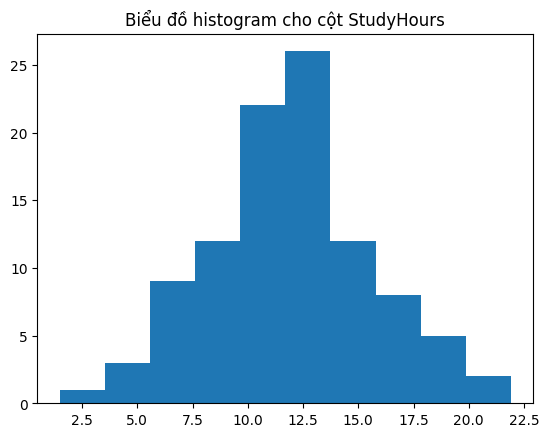

In [6]:
plt.hist(df['StudyHours'])
plt.title("Biểu đồ histogram cho cột StudyHours")
plt.show()

Nhận xét: 
- Số giờ học nhiều nhất là 12.5 
- Tập trung ở khoảng [~6-17.5]

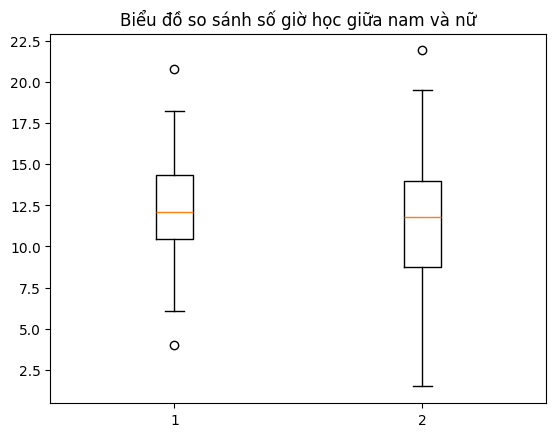

In [8]:
nam = df[df['Gender'] == 'Nam']
sgh_nam = nam['StudyHours']

nu = df[df['Gender'] == 'Nữ']
sgh_nu = nu['StudyHours']

plt.boxplot([sgh_nam, sgh_nu])
plt.title("Biểu đồ so sánh số giờ học giữa nam và nữ")
plt.show()

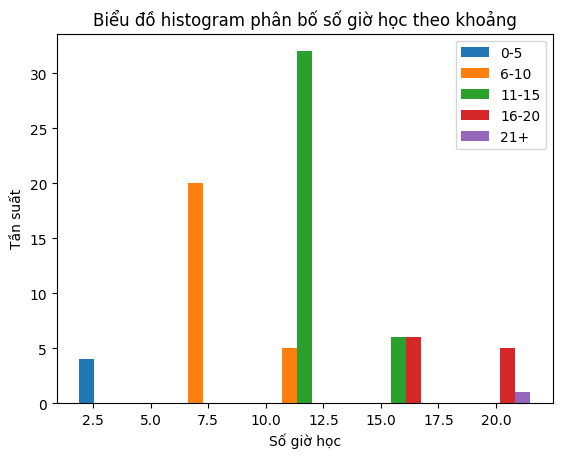

In [19]:
khoang_1 = df[(df['StudyHours'] >= 0) & (df['StudyHours'] <= 5)]['StudyHours']
khoang_2 = df[(df['StudyHours'] >= 6) & (df['StudyHours'] <= 10)]['StudyHours']
khoang_3 = df[(df['StudyHours'] >= 11) & (df['StudyHours'] <= 15)]['StudyHours']
khoang_4 = df[(df['StudyHours'] >= 16) & (df['StudyHours'] <= 20)]['StudyHours']
khoang_5 = df[(df['StudyHours'] >= 21)]['StudyHours']
plt.hist([khoang_1, khoang_2, khoang_3, khoang_4, khoang_5], label=["0-5", "6-10", "11-15", "16-20", "21+"], bins=5)
plt.title("Biểu đồ histogram phân bố số giờ học theo khoảng")
plt.xlabel("Số giờ học")
plt.ylabel("Tần suất")
plt.legend()
plt.show()

Nhận xét: 
- Từ biểu đồ thì đa số người học ở 12.5 là cao nhất
- Người học 2.5 cũng ít cho thấy sinh viên siêng năng

- Phần 3: Xác suất (3 điểm)
Một công ty khảo sát về việc sinh viên có sử dụng cà phê khi học tập không. Kết quả cho thấy:

70% sinh viên có uống cà phê.

- Trong số những sinh viên uống cà phê, 60% đạt điểm cao (>=8).

- Trong số những sinh viên không uống cà phê, chỉ 30% đạt điểm cao.

- Câu hỏi:

- Nếu chọn ngẫu nhiên một sinh viên, xác suất để sinh viên đó đạt điểm cao là bao nhiêu?

- Nếu biết một sinh viên đạt điểm cao, xác suất để sinh viên đó uống cà phê là bao nhiêu? (Dùng định lý Bayes)



In [20]:
p_uong = 0.7  # xác xuất sinh viên cà phê 
p_khong_uong = 0.3 # xác xuất sinh viên không uống cafe 

p_dat_diem_cao_uong = 0.6 
p_dat_diem_cao_khong_uong = 0.3 

# nhìn tờ giấy phần công thức xác xuất đầy đủ 
p_dd_cao = p_uong * p_dat_diem_cao_uong + p_khong_uong * p_dat_diem_cao_khong_uong
print("Xác xuất để sinh viên đạt điểm cao: ", p_dd_cao)

# nhìn vào bayes 
# thì ta cần tính là xác xuất sinh viên đó không uống cafe mà
# đạt điểm cao 
p_ku_ddc = p_khong_uong * p_dat_diem_cao_khong_uong 
bayes = p_ku_ddc / p_dd_cao
print("Xác xuất sinh viên không uống mà đạt điểm cao: ", bayes)

Xác xuất để sinh viên đạt điểm cao:  0.51
Xác xuất sinh viên không uống mà đạt điểm cao:  0.1764705882352941


- Phần 4: Các phân phối xác suất (3 điểm)
- Câu 1: Phân phối Nhị thức (Binomial Distribution) (1 điểm)
Một bài kiểm tra có 10 câu hỏi trắc nghiệm, mỗi câu có 4 lựa chọn và chỉ có 1 đáp án đúng. Nếu một sinh viên đoán ngẫu nhiên toàn bộ bài kiểm tra, xác suất để sinh viên đó trả lời đúng ít nhất 4 câu là bao nhiêu?



In [24]:
n = 10 
p = 0.25  # vì có 4 lựa chọn  1/ 4 
# sinh viên đoán đúng 4 câu thì P(X >= 4) = 1 - P(P <= 3)
# nhìn vào tờ giấy chỗ phần phân phối nhị thức 
p_3 = binom.cdf(3, n, p)
p_lh_3 = 1 - p_3 
print("Xác xuất để sinh viên đó trả lời đúng ít nhất 4 câu: ", p_lh_3)

Xác xuất để sinh viên đó trả lời đúng ít nhất 4 câu:  0.22412490844726562



- Câu 2: Phân phối Poisson (1 điểm)
Trung bình mỗi ngày có 3 khách hàng đến một cửa hàng mua laptop. Tính xác suất rằng trong một ngày bất kỳ:

- Không có khách nào đến mua laptop.

- Có ít nhất 2 khách đến mua laptop.

👉 Gợi ý: Dùng poisson.pmf() và poisson.cdf().


In [22]:
landa = 3 
# Lật tờ giấy đến phân phối poisson 
# P(x = 0) 
p_0 = poisson.pmf(0, landa)

# P(x >= 2) = 1 - P(x <= 1)
# đầu tiên tính P(x <= 1)
p_1 = poisson.cdf(1, landa)
p_2 = 1 - p_1 
print("Không có khách nào đến mua laptop: ", p_0)
print("Có ít nhất 2 khách đến mua laptop: ", p_2)

Không có khách nào đến mua laptop:  0.049787068367863944
Có ít nhất 2 khách đến mua laptop:  0.8008517265285442


- Câu 3: Phân phối Chuẩn (Normal Distribution) (1 điểm)
Chiều cao trung bình của sinh viên trong một trường đại học là 170 cm với độ lệch chuẩn 6 cm. Giả sử chiều cao tuân theo phân phối chuẩn.

+ Xác suất để một sinh viên có chiều cao lớn hơn 180 cm là bao nhiêu?

+ Khoảng chiều cao nào chứa 95% sinh viên trong trường?

In [23]:
# đọc đề và nhìn vào phân phối chuẩn 
# nhớ xem kĩ coi nó cho phương sai hay độ lệch chuẩn 
# vì nó muốn mình thấp điểm :))) 
# ta chỉ cần độ lệch chuẩn 
trung_binh = 170 
do_lech_chuan = 6 
# P(x > 180) = 1 - P(x <= 180)
# P(x <= 180)
p_180 = norm.cdf(180, loc=trung_binh, scale=do_lech_chuan)
p = 1 - p_180 
print("Xác xuất một sinh viên có chiều cao lớn hơn 180cm: ", p)

# nó cho xác xuất thì nhìn vào chỗ phân phối chuẩn 
# tui có ghi là cái mà cho xác xuất thì sài ppf 
# là ra x 
# (Nếu mà không có cho trung bình, độ lệch chuẩn) z = x
chieu_cao = norm.ppf(0.95, loc=trung_binh, scale=do_lech_chuan)
print(chieu_cao)

Xác xuất một sinh viên có chiều cao lớn hơn 180cm:  0.047790352272814696
179.86912176170884
